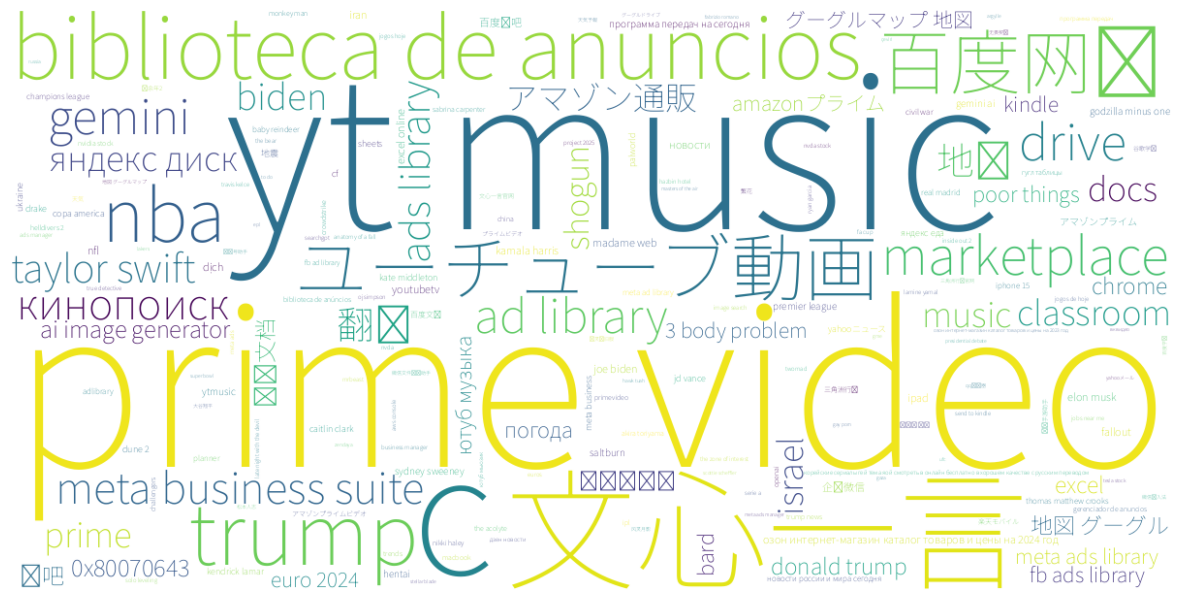

In [31]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import colormaps

# Load the CSV data
df = pd.read_csv('top_keywords_google.csv')

# Create a dictionary with 'Search Terms' as the keys and 'Traffic Share' as the values
word_freq = dict(zip(df['Search Terms'], df['Traffic Share']))

# Path to the CJK-compatible font (adjust this path to where your font is located)
font_path = 'tipo.ttf'

# Define a custom colormap (e.g., 'viridis' or any other colormap from matplotlib)
colormap = colormaps.get_cmap('viridis')  # Use the updated method to get colormap

# Generate the word cloud, specifying the font path, colors, and scaling
wordcloud = WordCloud(
    width=1200,                  # Increase width of the word cloud
    height=600,                  # Increase height of the word cloud
    background_color='white',    # Set background color
    font_path=font_path,         # CJK-compatible font
    colormap=colormap,           # Use colormap for colors
    max_font_size=250,           # Increase the max font size for wider words
    relative_scaling=0.5         # Adjust scaling to give more emphasis on bigger words
).generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(15, 8))       # Adjust figure size to make it wider
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

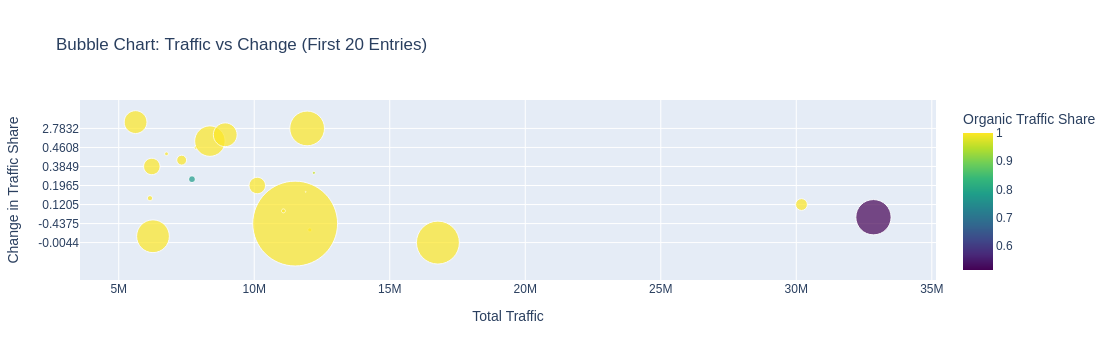

In [51]:
import pandas as pd
import plotly.express as px

# Load the data from the CSV file
df = pd.read_csv('top_keywords_google.csv')

# Filter the DataFrame to include only the first 20 rows
df_filtered = df.head(20)

# Sort the DataFrame by the 'Change' column
df_filtered = df_filtered.sort_values(by='Change')

# Create the bubble chart
fig = px.scatter(
    df_filtered,
    x='Traffic',                 # X-axis: Traffic
    y='Change',                  # Y-axis: Change
    size='Volume',               # Bubble size: Search Volume
    color='Organic',             # Bubble color based on Organic traffic share
    hover_name='Search Terms',   # Display Search Terms on hover
    title='Bubble Chart: Traffic vs Change (First 20 Entries)',
    labels={
        'Traffic': 'Total Traffic',
        'Change': 'Change in Traffic Share',
        'Volume': 'Search Volume',
        'Organic': 'Organic Traffic Share'
    },
    size_max=60,                # Maximum bubble size
    color_continuous_scale=px.colors.sequential.Viridis  # Color scale
)

# Show the figure
fig.show()
